# Unit 2 seminar preparation - exploratory data analysis

## Initial setup


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [43]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, delim_whitespace=True, names=columns)

In [ ]:
# initial exploration (first 10 rows)

df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [ ]:
# variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
# summary statistics for numeric variables
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [44]:
# Recode origin as object (factor) and calculate counts

df['origin']=df['origin'].astype(object)

print(df.origin.value_counts())

print("No dictionary is provided, but based on the assingment description we'll assume 1-America, 2-Europe, 3-Asia")

origin
1    249
3     79
2     70
Name: count, dtype: int64
No dictionary is provided, but based on the assingment description we'll assume 1-America, 2-Europe, 3-Asia


In [45]:
# inspect car name variable
df['car_name'].value_counts

print(df['car_name'].sort_values())


96     amc ambassador brougham
9           amc ambassador dpl
66          amc ambassador sst
315                amc concord
257                amc concord
                ...           
394                  vw pickup
309                  vw rabbit
197                  vw rabbit
325       vw rabbit c (diesel)
293           vw rabbit custom
Name: car_name, Length: 398, dtype: object


In [ ]:
# inspect horsepower variable

# why is this variable object?
df['horsepower'].value_counts

<bound method IndexOpsMixin.value_counts of 0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, Length: 398, dtype: object>

In [ ]:
df['horsepower'].sort_values()




133    100.0
98     100.0
256    100.0
107    100.0
334    100.0
       ...  
126        ?
374        ?
354        ?
32         ?
336        ?
Name: horsepower, Length: 398, dtype: object

Missing values for horsepower coded as "?", need replacing with NA

In [47]:
# Replacing missing values in horsepower
df.replace('?', np.nan, inplace=True)
df['horsepower'] = pd.to_numeric(df['horsepower'])


In [17]:
# Task 1: identify missing values
df.info()

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
Missing Values:
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


6 missing values for horsepower, all others complete.

In [23]:
# Task 2: stimate Skewness and Kurtosis
# Select only numeric columns 
numeric_cols = df.select_dtypes(include=[np.number]).columns
skewness = df[numeric_cols].skew()
kurtosis_values = df[numeric_cols].kurtosis()

print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis_values)


Skewness:
 mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model_year      0.011535
origin          0.923776
dtype: float64

Kurtosis:
 mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.696947
weight         -0.785529
acceleration    0.419497
model_year     -1.181232
origin         -0.817597
dtype: float64


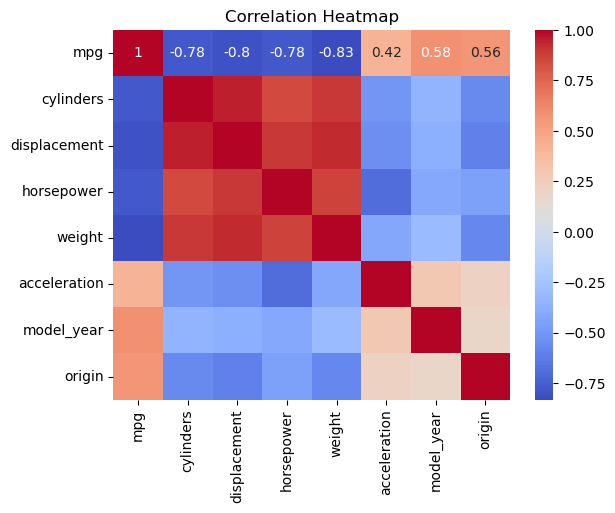

In [25]:
# Task 3: Correlation Heat Map
# plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

c:\Users\guilhermep\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\guilhermep\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\guilhermep\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\guilhermep\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

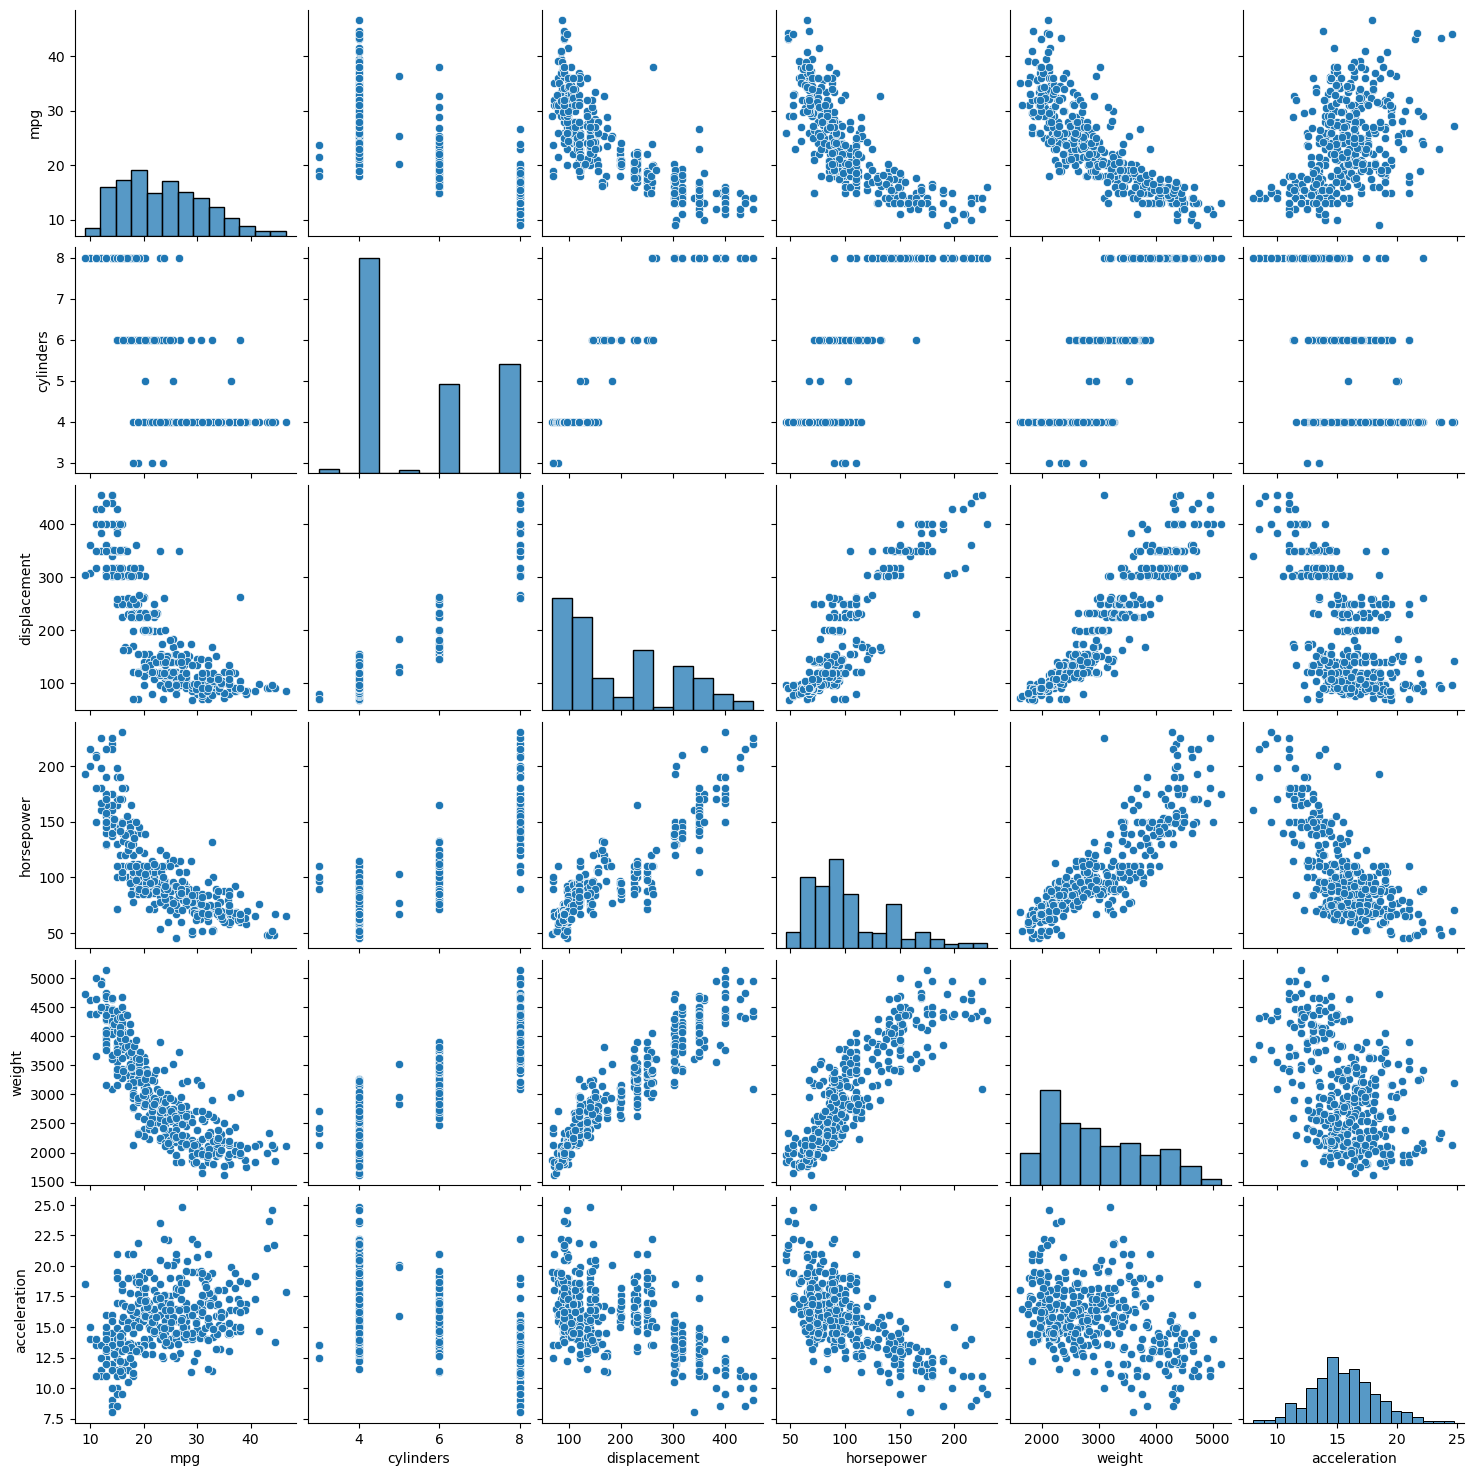

In [28]:
# Task 4: Scatter plot for different parameters
sns.pairplot(df[numeric_cols].drop(['model_year','origin'], axis=1))
plt.show()

In [48]:
# Task 5: Replace categorical values with numerical values (e.g. origin)

# origin already coded as numerical variable, but will do the other way around



df.origin.replace([1,2,3],
                  ['America','Europe','Asia'],
                  inplace=True)

df.origin.value_counts()

origin
America    249
Asia        79
Europe      70
Name: count, dtype: int64